<a href="https://colab.research.google.com/github/SadhanaDas/Boston-housing-Project/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [142]:
df=pd.read_csv("Boston.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [143]:
# statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [144]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [145]:
# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

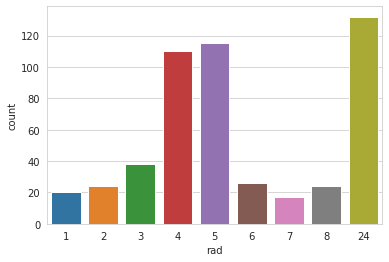

In [146]:
sns.set_style("whitegrid")
sns.countplot(x="rad",data=df)

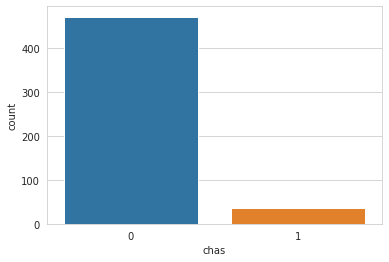

In [147]:
sns.set_style("whitegrid")
sns.countplot(x="chas",data=df)

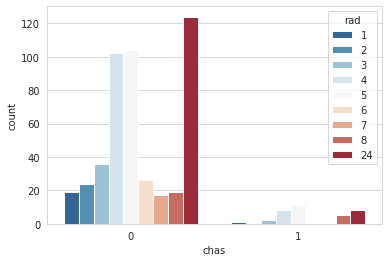

In [148]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r')

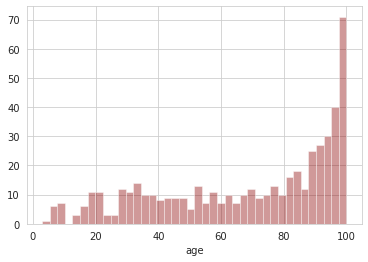

In [149]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

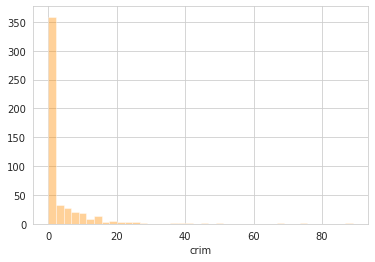

In [150]:
sns.distplot(df['crim'].dropna(),kde=False,color='darkorange',bins=40)

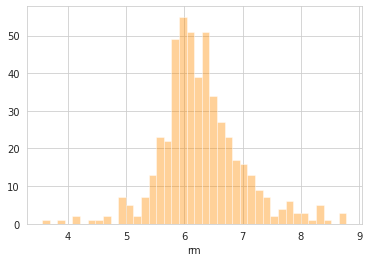

In [151]:
sns.distplot(df['rm'].dropna(),kde=False,color='darkorange',bins=40)

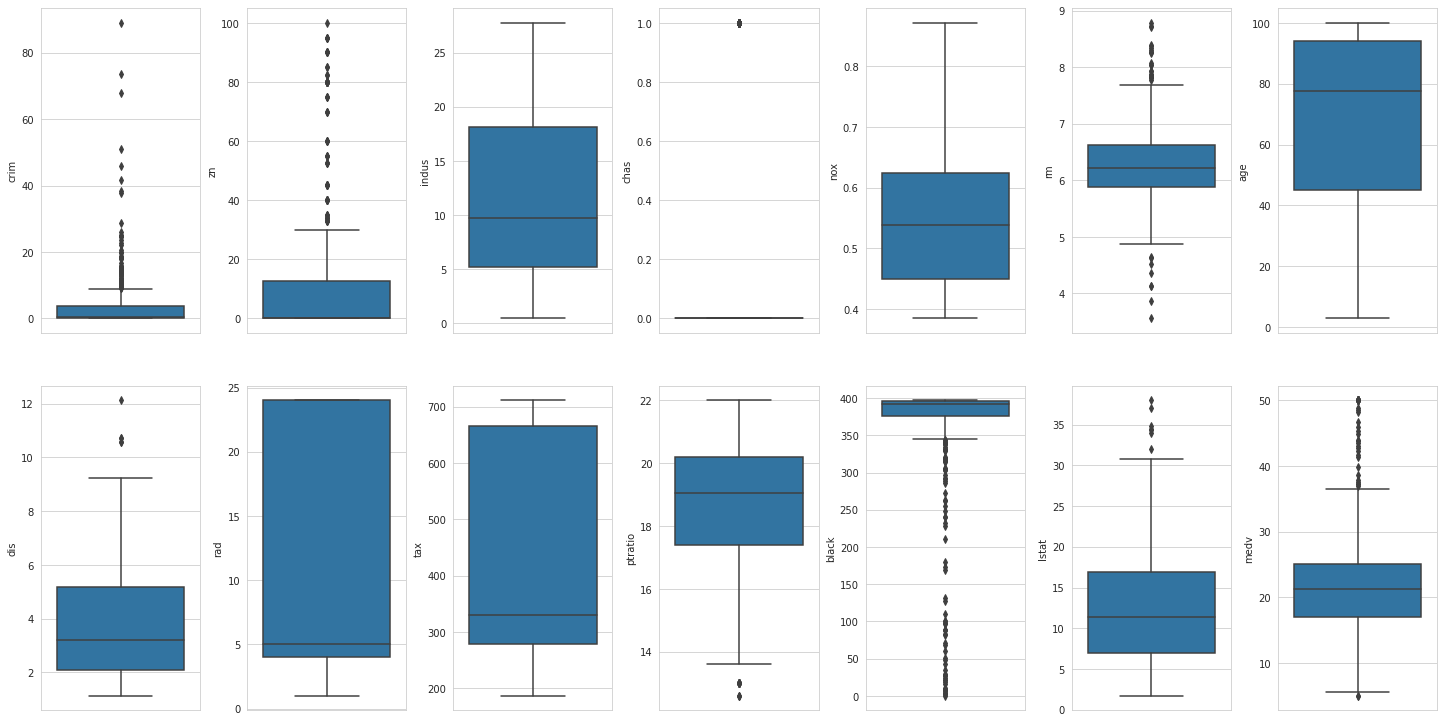

In [152]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

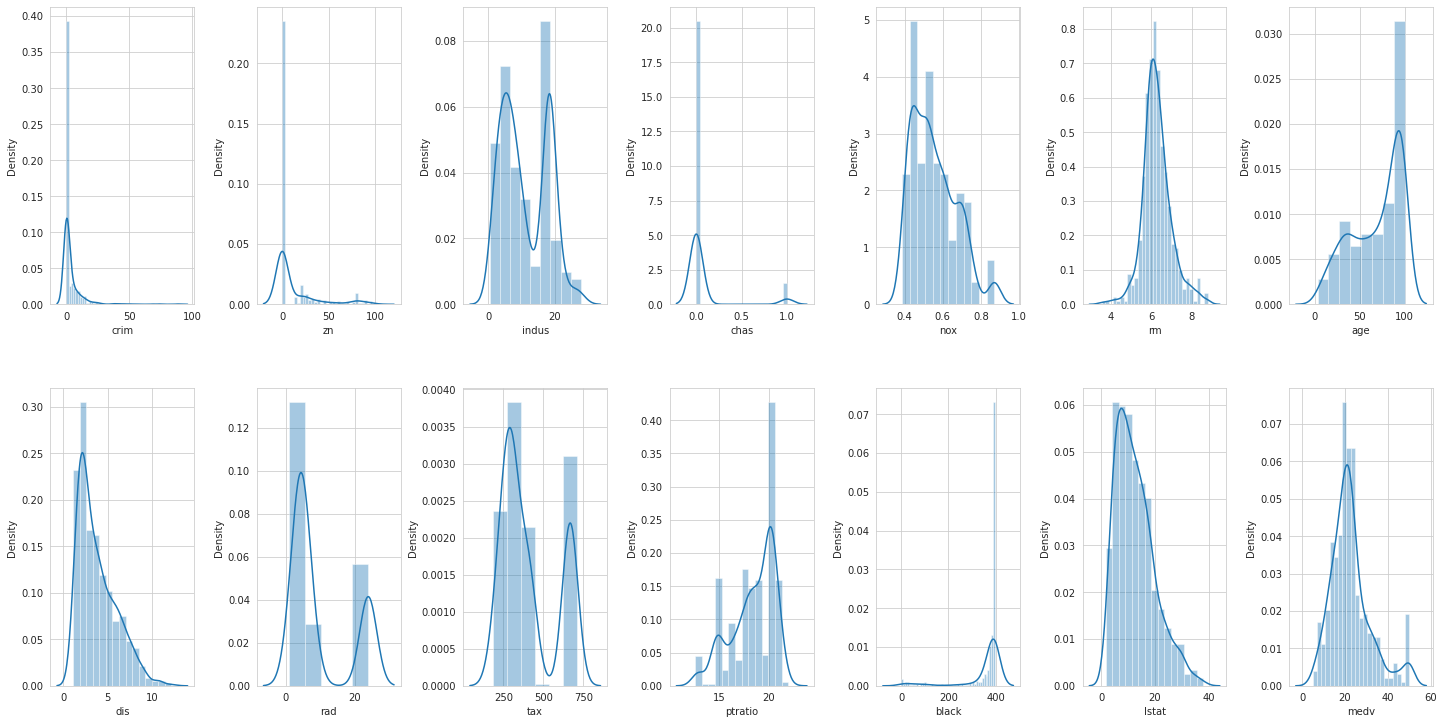

In [153]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Min-Max Normalization

In [154]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

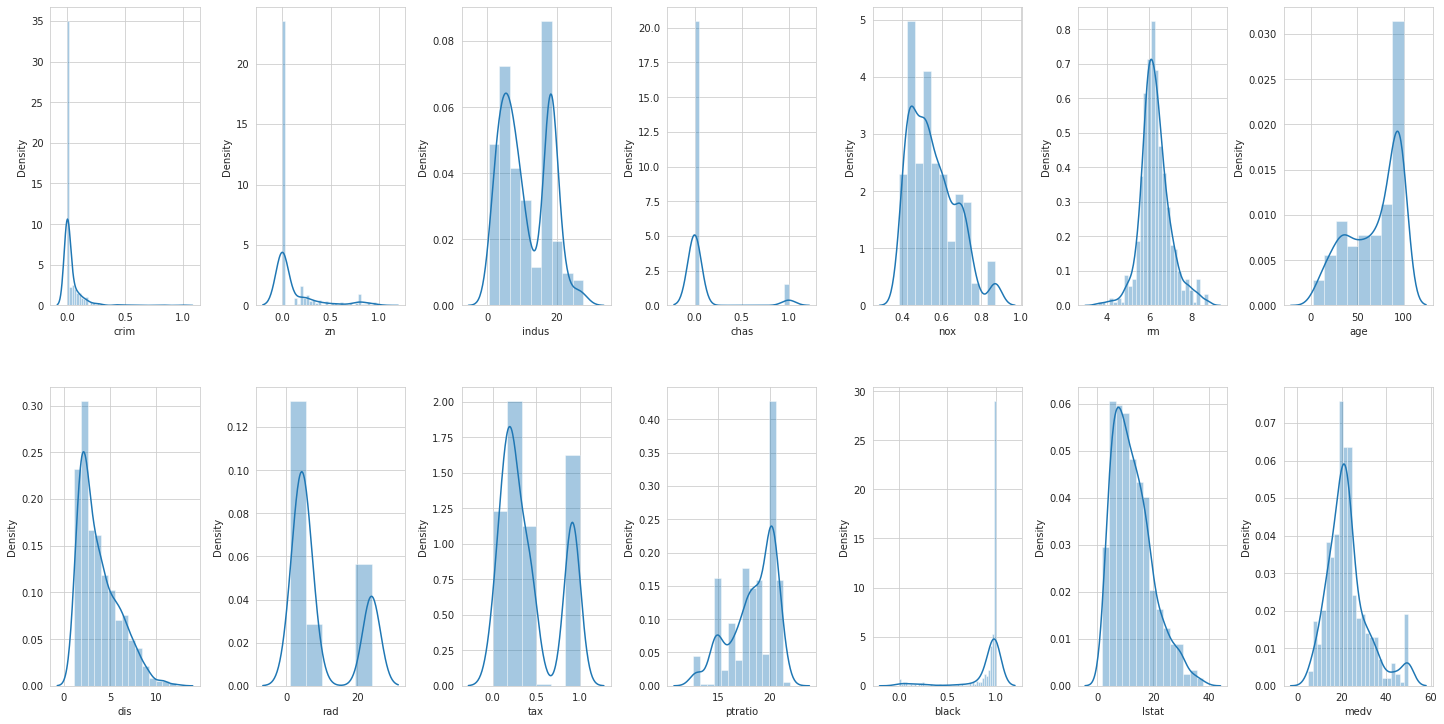

In [155]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [156]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [157]:
for col in cols:
    df[col] = scaled_cols[col]

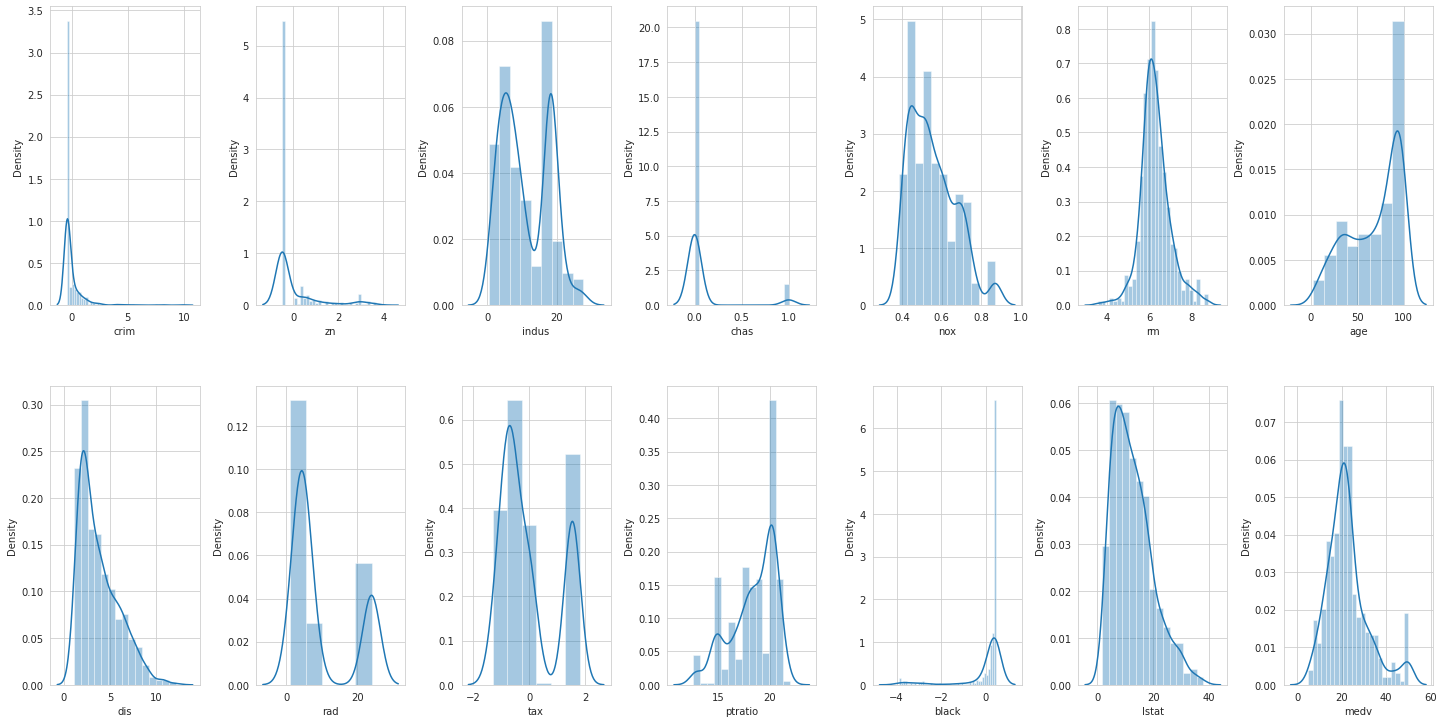

In [158]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Coorelation Matrix

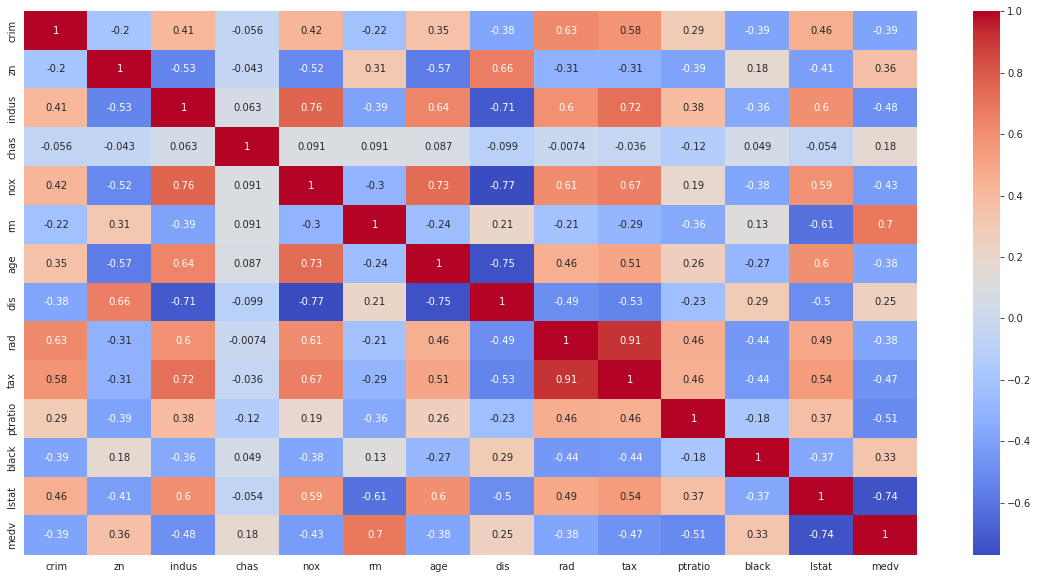

In [159]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

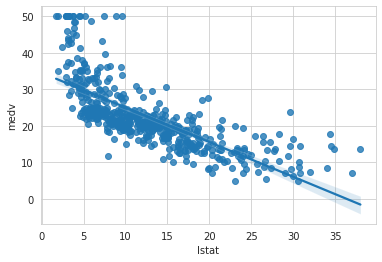

In [160]:
sns.regplot(y=df['medv'], x=df['lstat'])

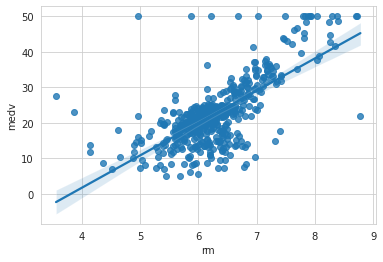

In [161]:
sns.regplot(y=df['medv'], x=df['rm'])

Input Split

In [162]:
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']

Model Training

In [163]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 23.871005067364894
CV Score: 35.58136621076922


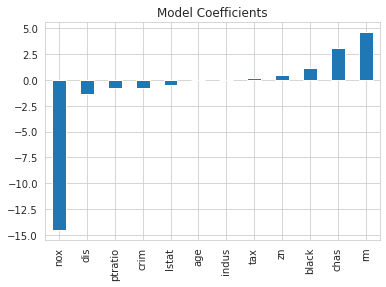

In [164]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 21.67204724409449
CV Score: 41.90328674043875


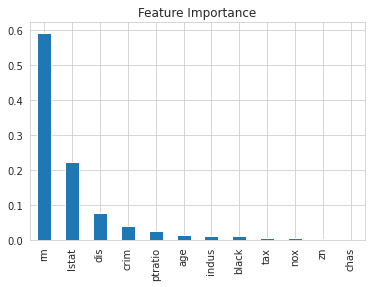

In [165]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.383138937007878
CV Score: 21.30432268707046


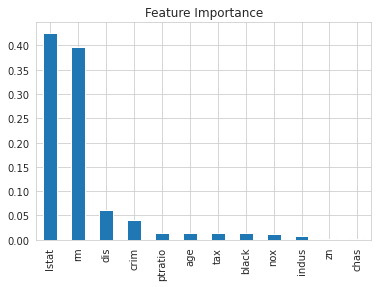

In [166]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.597401165354333
CV Score: 20.385813070199948


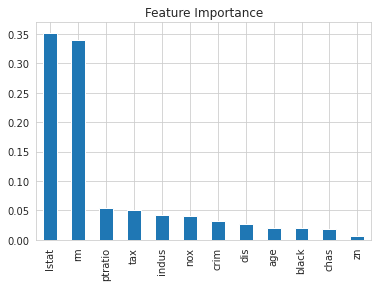

In [167]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MSE: 10.032316106542387
CV Score: 17.971291041858336


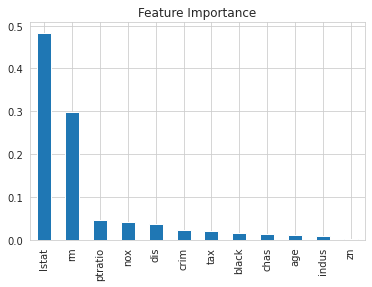

In [168]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Feature Importance

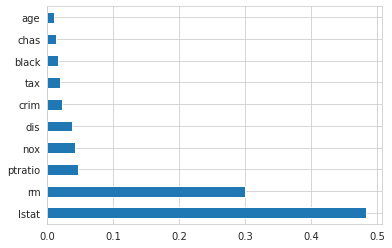

In [169]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [170]:
corr=df.corr()
corr.shape

(14, 14)

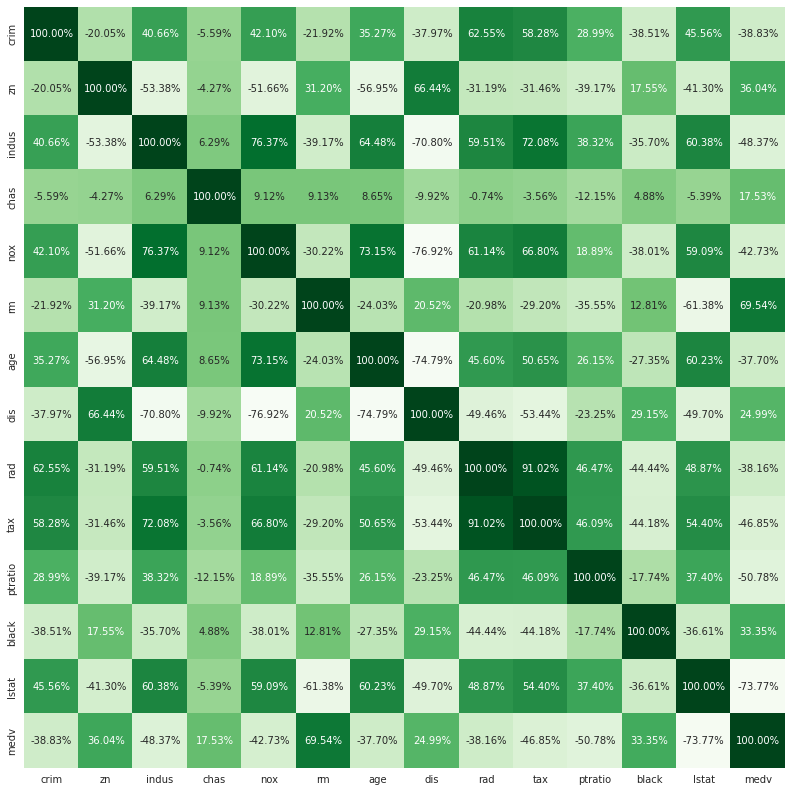

In [171]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt= ".2%", annot=True, cmap="Greens")

Model Fitting

Linear Regression

In [172]:
#values Assigning
x= df.iloc[:,0:13]
y= df.iloc[:,-1]

In [173]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [174]:
from sklearn.linear_model import LinearRegression
model= LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [175]:
 y_pred = model.predict(x_train)

In [176]:
print("Training Accuracy:",model.score (x_train,y_train)*100) 

Training Accuracy: 77.30135569264233


In [177]:
print ("Testing Accuracy:" ,model.score(x_text,y_test)*100)

Testing Accuracy: 58.922238491825155


In [178]:
from sklearn.metrics import mean_squared_error, r2_score

In [179]:
print ("Model Accuracy:", r2_score(y,model.predict(x))*100)

Model Accuracy: 73.73440319905036


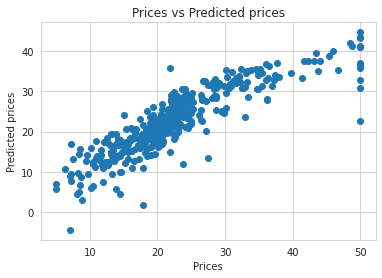

In [180]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel ("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

<function matplotlib.pyplot.show>

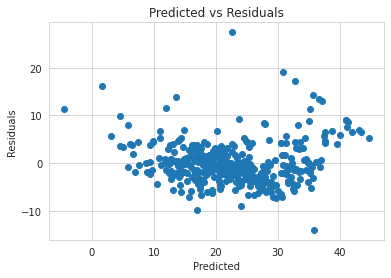

In [181]:
#checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.ylabel("Residuals")
plt.xlabel ("Predicted")
plt.title("Predicted vs Residuals")
plt.show

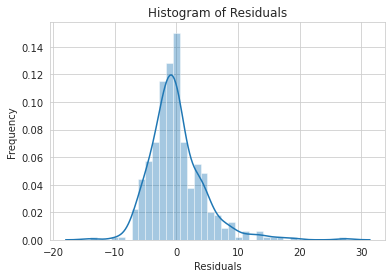

In [182]:
#checking normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Random Forest Regressor

In [183]:
X = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [185]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [186]:
y_pred = reg.predict(X_train)

In [187]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 99.99199635164813


In [188]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 99.98085752134241


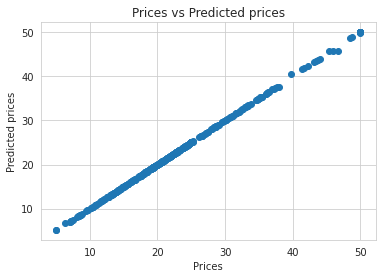

In [189]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

Linear Regression
Model Score: 73.1% Accuracy
Tarining Accuracy: 72.9% Accuracy
Testing Accuracy: 73.1% Accuracy

Random Forest Regressor
Tarining Accuracy: 99.9% Accuracy
Testing Accuracy: 99.8% Accuracy